In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_business=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_business.csv")


In [3]:
df_business.columns


Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories', 'hours', 'attributes.GoodForKids',
       'attributes.RestaurantsReservations', 'attributes.GoodForMeal',
       'attributes.BusinessParking', 'attributes.Caters',
       'attributes.NoiseLevel', 'attributes.RestaurantsTableService',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2',
       'attributes.OutdoorSeating', 'attributes.BikeParking',
       'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi',
       'attributes.Alcohol', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery',
       'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday',
       'hours.Friday', 'hours.Saturday', 'hours.Sunday',
       'attributes.BusinessAcceptsCreditCards', 'attributes',
       'attributes.BusinessAcceptsBitcoin', '

In [4]:
df_business=df_business[df_business['categories'].apply(lambda x: True if 'Restaurants' in str(x)else False)].reset_index(drop=True)
df_reviews=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_review.csv")


C:\Users\apoor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df10=df_business.drop_duplicates(subset=['business_id'],keep= 'last')

In [6]:
df10['business_id'].count()

6450

In [7]:
df10=df10.replace(to_replace=[0,1], value = ['Closed','Open'])

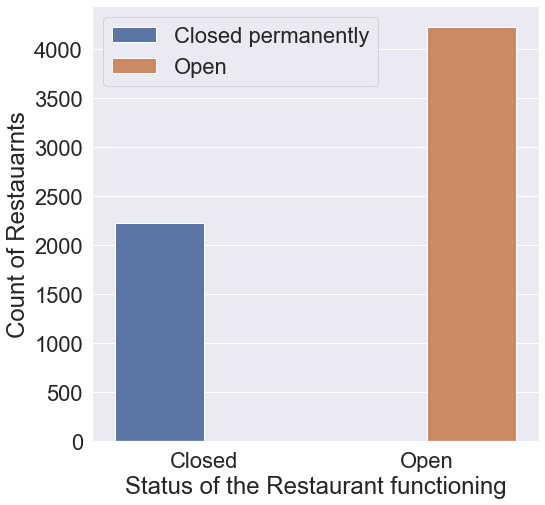

In [8]:
plt.figure(figsize=(8,8))

sns.set(font_scale=2)
ax=sns.countplot(x='is_open',data=df10,hue='is_open')
ax.set(xlabel='Status of the Restaurant functioning',ylabel='Count of Restauarnts')
plt.legend(['Closed permanently','Open'])


In [26]:
df_businessone= df_business.drop_duplicates(subset=['business_id'],keep= 'last')

[Text(0, 0.5, 'Number of Restaurants'),
 Text(0.5, 0, 'Ratings of the Restaurants')]

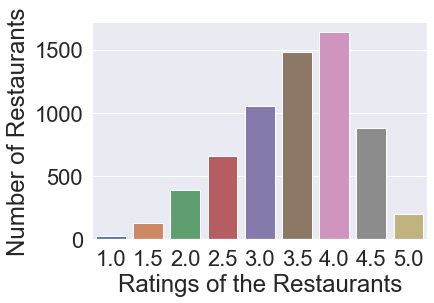

In [29]:
ay=sns.countplot(x='stars',data=df_businessone)
ay.set(xlabel='Ratings of the Restaurants',ylabel='Number of Restaurants')

In [9]:
hundred_business=list(set(df_business['business_id']))[0:100]
print(df_business.head())
df_users=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_user.csv")

   Unnamed: 0             business_id                                 name  \
0           1  PZ-LZzSlhSe9utkQYU8pFg           Carluccio's Tivoli Gardens   
1           6  tstimHoMcYbkSC4eBA1wEg  Maria's Mexican Restaurant & Bakery   
2          17  kANF0dbeoW34s2vwh6Umfw                          Dairy Queen   
3          26  X8mtoSxY8whtmbDlj0D3Aw                Imperial Asian Buffet   
4          31  bJP4l_BGq2CudEu0m-wNjg             Artisan Fine Dining Room   

                            address       city state  postal_code   latitude  \
0      1775 E Tropicana Ave, Ste 29  Las Vegas    NV      89119.0  36.100016   
1             6055 E Lake Mead Blvd  Las Vegas    NV      89156.0  36.195615   
2           6125 Spring Mountain Rd  Las Vegas    NV      89146.0  36.125031   
3                  4343 N Rancho Dr  Las Vegas    NV      89030.0  36.238596   
4  Artisan Hotel, 1501 W Sahara Ave  Las Vegas    NV      89102.0  36.143672   

    longitude  stars  ...  attributes.BYOBCorkage 

C:\Users\apoor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_reviews = df_reviews[df_reviews['business_id'].isin(hundred_business)].reset_index(drop=True)
df_review_users = pd.merge(df_users, df_reviews, on='user_id', how='left')
df_review_users = df_review_users[df_review_users['business_id'].isin(hundred_business)].reset_index(drop=True)


In [9]:
df_final = pd.merge(df_business, df_review_users, on='business_id', how='right').reset_index(drop=True)

In [10]:
df_final.head()

,Unnamed: 0,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars_x,...,compliment_writer,compliment_photos,Unnamed: 0_y,review_id,stars_y,useful_y,funny_y,cool_y,text,date
0,36,k-dDZvTeLysoJvjHI-qr9g,Feast Buffet,2411 W Sahara Ave,Las Vegas,NV,89102.0,36.142116,-115.174252,3.0,...,82,40,65669,lS3PhbWzsjTOtFVy6r_L2w,3.0,2.0,0.0,0.0,This was not the best buffet I have ever been ...,2013-10-09 20:56:58
1,36,k-dDZvTeLysoJvjHI-qr9g,Feast Buffet,2411 W Sahara Ave,Las Vegas,NV,89102.0,36.142116,-115.174252,3.0,...,21,40,25820,aBK2ua18yc3treQRvA6XRQ,3.0,6.0,4.0,5.0,For a $6.99 lunch at 3:30 was a deal instead o...,2014-09-28 06:31:58
2,36,k-dDZvTeLysoJvjHI-qr9g,Feast Buffet,2411 W Sahara Ave,Las Vegas,NV,89102.0,36.142116,-115.174252,3.0,...,76,19,141397,IkNJfzwky5gAXYKURUgfhA,2.0,5.0,4.0,1.0,Really...I only came to this buffet because:\n...,2014-01-13 21:27:08
3,36,k-dDZvTeLysoJvjHI-qr9g,Feast Buffet,2411 W Sahara Ave,Las Vegas,NV,89102.0,36.142116,-115.174252,3.0,...,76,19,189017,QpE69PuqsiSGgQc_rtW1HA,3.0,10.0,1.0,4.0,Been back to newly remodeled Feast Buffet for ...,2018-09-18 19:04:52
4,36,k-dDZvTeLysoJvjHI-qr9g,Feast Buffet,2411 W Sahara Ave,Las Vegas,NV,89102.0,36.142116,-115.174252,3.0,...,1,0,138469,Tj1U7Tc_SoEXlnx9p1qYCA,4.0,0.0,0.0,0.0,So My Boyfriend and I tried this out this week...,2015-11-04 12:29:13


In [11]:
for col in df_final:
    print(col)

Unnamed: 0
business_id
name_x
address
city
state
postal_code
latitude
longitude
stars_x
review_count_x
is_open
categories
hours
attributes.GoodForKids
attributes.RestaurantsReservations
attributes.GoodForMeal
attributes.BusinessParking
attributes.Caters
attributes.NoiseLevel
attributes.RestaurantsTableService
attributes.RestaurantsTakeOut
attributes.RestaurantsPriceRange2
attributes.OutdoorSeating
attributes.BikeParking
attributes.Ambience
attributes.HasTV
attributes.WiFi
attributes.Alcohol
attributes.RestaurantsAttire
attributes.RestaurantsGoodForGroups
attributes.RestaurantsDelivery
hours.Monday
hours.Tuesday
hours.Wednesday
hours.Thursday
hours.Friday
hours.Saturday
hours.Sunday
attributes.BusinessAcceptsCreditCards
attributes
attributes.BusinessAcceptsBitcoin
attributes.ByAppointmentOnly
attributes.AcceptsInsurance
attributes.Music
attributes.GoodForDancing
attributes.CoatCheck
attributes.HappyHour
attributes.BestNights
attributes.WheelchairAccessible
attributes.DogsAllowed
attribu

In [174]:
kmeans_df=kmeans_df.to_frame()

In [11]:
kmeans_df.columns = ['count']

NameError: name 'kmeans_df' is not defined

In [176]:
kmeans_df.reset_index(inplace=True)

In [177]:
kmeans_df.columns = ['user_id','stars_x','count']

In [178]:
kmeans_df.index.name= 'index'

In [179]:
kmeans_df

,user_id,stars_x,count
index,,,
0,--RlSfc-QmcHFGHyX6aVjA,4.0,2
1,-0HhZbPBlB1YZx3BhAfaEA,3.0,1
2,-0vlf0Y30InDAiFbdGIe9w,3.5,1
3,-16aKjco1c0RJ7c4U-q_Kw,3.5,1
4,-1ZXOoZP45tZDZVARALjzg,4.0,1
5,-1_RJoRLeoDK3h_gNjf7UA,4.5,1
6,-267Yx8RmdP6io2-qI4UcQ,4.0,2
7,-26Qp2RKz7DQwCEKLUbxCQ,4.5,1
8,-2CainXEr63oltxnExHGgg,4.5,1


In [180]:
new= pd.pivot_table(kmeans_df,index='user_id',columns='stars_x',values='count')

In [181]:
new

stars_x,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
user_id,,,,,,,,
--RlSfc-QmcHFGHyX6aVjA,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
-0HhZbPBlB1YZx3BhAfaEA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
-0vlf0Y30InDAiFbdGIe9w,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
-16aKjco1c0RJ7c4U-q_Kw,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
-1ZXOoZP45tZDZVARALjzg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
-1_RJoRLeoDK3h_gNjf7UA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
-267Yx8RmdP6io2-qI4UcQ,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
-26Qp2RKz7DQwCEKLUbxCQ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
-2CainXEr63oltxnExHGgg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [182]:
new=new.fillna(0)

In [183]:
new

stars_x,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
user_id,,,,,,,,
--RlSfc-QmcHFGHyX6aVjA,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
-0HhZbPBlB1YZx3BhAfaEA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
-0vlf0Y30InDAiFbdGIe9w,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-16aKjco1c0RJ7c4U-q_Kw,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-1ZXOoZP45tZDZVARALjzg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
-1_RJoRLeoDK3h_gNjf7UA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
-267Yx8RmdP6io2-qI4UcQ,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
-26Qp2RKz7DQwCEKLUbxCQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
-2CainXEr63oltxnExHGgg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
new.to_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/main_new.csv")

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [187]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
new=scaler.fit_transform(new)

In [231]:
ssd = []
#cluster_range = np.arange(2,15)
cluster_range = np.arange(2,15)
for each_cluster in range(2,15):
    kmeans = KMeans(n_clusters=each_cluster,init='k-means++', random_state=0)
    kmeans.fit(new)
    
    ssd.append(kmeans.inertia_)

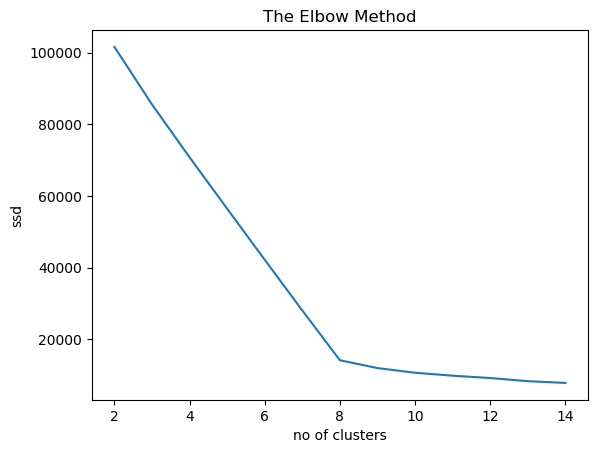

In [232]:
plt.plot(range(2,15), ssd)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

In [233]:
km = KMeans(
    n_clusters=8,  random_state=0
)
y_km = km.fit_predict(new)

In [234]:
y_km

array([2, 3, 1, ..., 5, 0, 2])

In [192]:
y=range(1,14742)

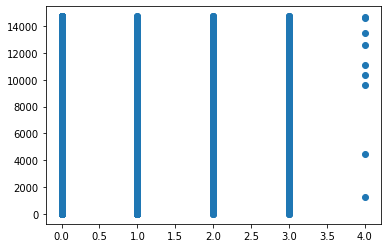

In [193]:
plt.scatter(y_km,y,cmap='brg')

In [216]:

plt.rcParams.update(plt.rcParamsDefault)

In [194]:
plt.scatter(y_km[:,0],y_km[:,1])

IndexError: too many indices for array

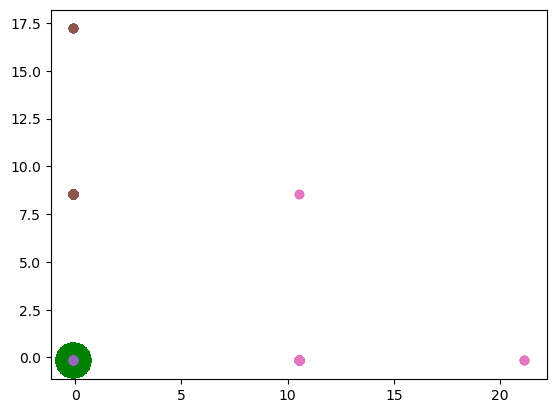

In [235]:
plt.scatter(
    new[y_km == 0, 0], new[y_km == 0, 1],
    #s=600, c='lightgreen',
    #marker='s', edgecolor='black',
    #label='cluster 1'
)

plt.scatter(
    new[y_km == 1, 0], new[y_km == 1, 1],
    #s=600, c='orange',
    #marker='o', edgecolor='black',
    #label='cluster 2'
)
plt.scatter(
    new[y_km == 2, 0], new[y_km == 2, 1],
    s=600, c='green',
    #marker='.', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    new[y_km == 3, 0], new[y_km == 3, 1],
    #s=600, c='red',
    #marker=',', edgecolor='black',
    #label='cluster 4'
)
plt.scatter(
    new[y_km == 4, 0], new[y_km == 4, 1],
    #s=600, c='blue',
    #marker='+', edgecolor='black',
    #label='cluster 5'
)
plt.scatter(
    new[y_km == 5, 0], new[y_km == 5, 1],
    #s=600, c='yellow',
    #marker='v', edgecolor='black',
    #label='cluster 6'
)
plt.scatter(
 new[y_km == 6, 0], new[y_km == 6, 1],
 #   s=50, c='violet',
  #  marker='<', edgecolor='black',
   # label='cluster 7'
)
plt.scatter(
  new[y_km == 7, 0], new[y_km == 7, 1],
  #  s=50, c='magenta',
   # marker='>', edgecolor='black',
    #label='cluster 8'
)

In [22]:
bskt_tot_df = df_final[['user_id', 'stars_x']]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster)
    kmeans.fit(bskt_tot_df_scaled)
    
    ssd.append(kmeans.inertia_)


In [ ]:
plt.plot(range(2,15), ssd)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(bskt_tot_df_scaled)


In [ ]:
df_final['is_open']=df_final[]

In [236]:
df_final['business_id'].count()

17191

In [32]:
df4=pd.read_excel("C:/Desktop/df_final.xlsx")

In [237]:
df6=df4.drop_duplicates(subset=['business_id'],keep= 'last')

In [238]:
df6

,Unnamed: 0,Unnamed: 0.1,business_id,name_x,address,city,state,postal_code,latitude,longitude,...,compliment_writer,compliment_photos,Unnamed: 0_y,review_id,stars_y,useful_y,funny_y,cool_y,text,date
2,2,563,THOZYeKWKyW_-6U30E1b5w,Angelinas Pizza,"O' Aces Bar, 3003 N Rainbow",Las Vegas,NV,89108,36.213848,-115.242603,...,0,0,133274,BCch2BV5RPuacHsHxXCbDw,1,0,0,0,Dissappointing. It took over an hour to get to...,2012-04-16 17:36:28
12,12,590,707ST4xhNavXNvZtEL-RgQ,Windy City Beefs 'N Dogs,7006 W Charleston Blvd,Las Vegas,NV,89145,36.159616,-115.251523,...,0,0,163389,5N9tSazxP4ZN48J-DOZtNw,5,1,0,0,As a person recently introduced to traditional...,2012-04-18 00:54:26
167,167,918,r-wz3rmeNGLBMOqtfXnxog,Don Michael's,4864 W Lone Mountain Rd,Las Vegas,NV,89130,36.247280,-115.208920,...,0,0,187815,diXx_C5WMirxaCU49aaY9Q,5,0,0,0,Best Italian food I've never had ! The owners ...,2018-10-07 04:04:24
366,366,997,0G1y7uV7w1D2uziS4Lt_Dw,Chapalas Mexican Restaurants,3331 E Tropicana Ave,Las Vegas,NV,89121,36.099613,-115.103913,...,0,0,182139,qlosFz4TdEYdrqXsNFbJcw,5,0,0,0,me and my mom were taking here for first time ...,2018-11-05 23:02:45
377,377,1034,vafLJO0wyb421AlOfxMiig,Mamma's Boy Cafe,"6475 W Charleston Blvd, Ste 160",Las Vegas,NV,89146,36.158604,-115.236715,...,0,0,181326,SKSVlZVjvKKfp8dpKZCUOg,1,7,0,0,My boyfriend was extremely excited about going...,2014-07-24 21:06:00
416,416,1170,rMVi-Vn_mN_X9J1ZSl1lWA,Baja Fresh,"7501 W Lake Mead Blvd, Ste 100",Las Vegas,NV,89128,36.195451,-115.257432,...,0,0,186284,RkNIQjt8hXVSu_l7jeb9EQ,1,0,0,0,"I have always loved the food here, but lately ...",2016-02-21 04:03:27
450,450,1188,x2Y_MD5pCTRyaf9dD_ZpGw,Teriyaki Madness,"4503 Paradise Rd, Ste 320",Las Vegas,NV,89169,36.107533,-115.153061,...,0,0,192721,5Q6VaNgDsSeq5XUKYrGGQQ,5,0,0,0,This is the best location ever really friendly...,2018-10-03 04:07:34
456,456,1473,Rjd3YgkooUHodPcDaQVjvw,"Big Al,s Chicago Deli",McCarran Airport,Las Vegas,NV,89119,36.085713,-115.149418,...,0,0,94740,i2gvbBURMKLDIhkQRn_TQQ,1,0,0,0,At most five inch sub with pre packaged meats ...,2014-07-18 20:32:29
492,492,1576,oI11Y5AZscmmn12Yv3PinQ,Subway,9265 S Cimarron Rd,Las Vegas,NV,89178,36.019863,-115.270408,...,0,0,184404,tlav5I2vWFaJe75O2eJMZA,1,0,0,0,"If you like meatball subs, don't go here. They...",2017-12-29 03:58:46
495,495,2102,Ziqzfvpp2cpZAu0OwjiD5w,Hamada's Asiana,3700 W Flamingo Rd,Las Vegas,NV,89103,36.116382,-115.185025,...,5,0,186939,O-h8lHKFzYxP-I7CkooaxQ,1,0,0,0,I have eaten here two times. Once back in 2006...,2011-04-17 12:35:53


In [239]:
df6=df6.replace(to_replace=[0,1], value = ['Closed','Open'])

In [240]:
df6

,Unnamed: 0,Unnamed: 0.1,business_id,name_x,address,city,state,postal_code,latitude,longitude,...,compliment_writer,compliment_photos,Unnamed: 0_y,review_id,stars_y,useful_y,funny_y,cool_y,text,date
2,2,563,THOZYeKWKyW_-6U30E1b5w,Angelinas Pizza,"O' Aces Bar, 3003 N Rainbow",Las Vegas,NV,89108,36.213848,-115.242603,...,Closed,Closed,133274,BCch2BV5RPuacHsHxXCbDw,Open,Closed,Closed,Closed,Dissappointing. It took over an hour to get to...,2012-04-16 17:36:28
12,12,590,707ST4xhNavXNvZtEL-RgQ,Windy City Beefs 'N Dogs,7006 W Charleston Blvd,Las Vegas,NV,89145,36.159616,-115.251523,...,Closed,Closed,163389,5N9tSazxP4ZN48J-DOZtNw,5,Open,Closed,Closed,As a person recently introduced to traditional...,2012-04-18 00:54:26
167,167,918,r-wz3rmeNGLBMOqtfXnxog,Don Michael's,4864 W Lone Mountain Rd,Las Vegas,NV,89130,36.247280,-115.208920,...,Closed,Closed,187815,diXx_C5WMirxaCU49aaY9Q,5,Closed,Closed,Closed,Best Italian food I've never had ! The owners ...,2018-10-07 04:04:24
366,366,997,0G1y7uV7w1D2uziS4Lt_Dw,Chapalas Mexican Restaurants,3331 E Tropicana Ave,Las Vegas,NV,89121,36.099613,-115.103913,...,Closed,Closed,182139,qlosFz4TdEYdrqXsNFbJcw,5,Closed,Closed,Closed,me and my mom were taking here for first time ...,2018-11-05 23:02:45
377,377,1034,vafLJO0wyb421AlOfxMiig,Mamma's Boy Cafe,"6475 W Charleston Blvd, Ste 160",Las Vegas,NV,89146,36.158604,-115.236715,...,Closed,Closed,181326,SKSVlZVjvKKfp8dpKZCUOg,Open,7,Closed,Closed,My boyfriend was extremely excited about going...,2014-07-24 21:06:00
416,416,1170,rMVi-Vn_mN_X9J1ZSl1lWA,Baja Fresh,"7501 W Lake Mead Blvd, Ste 100",Las Vegas,NV,89128,36.195451,-115.257432,...,Closed,Closed,186284,RkNIQjt8hXVSu_l7jeb9EQ,Open,Closed,Closed,Closed,"I have always loved the food here, but lately ...",2016-02-21 04:03:27
450,450,1188,x2Y_MD5pCTRyaf9dD_ZpGw,Teriyaki Madness,"4503 Paradise Rd, Ste 320",Las Vegas,NV,89169,36.107533,-115.153061,...,Closed,Closed,192721,5Q6VaNgDsSeq5XUKYrGGQQ,5,Closed,Closed,Closed,This is the best location ever really friendly...,2018-10-03 04:07:34
456,456,1473,Rjd3YgkooUHodPcDaQVjvw,"Big Al,s Chicago Deli",McCarran Airport,Las Vegas,NV,89119,36.085713,-115.149418,...,Closed,Closed,94740,i2gvbBURMKLDIhkQRn_TQQ,Open,Closed,Closed,Closed,At most five inch sub with pre packaged meats ...,2014-07-18 20:32:29
492,492,1576,oI11Y5AZscmmn12Yv3PinQ,Subway,9265 S Cimarron Rd,Las Vegas,NV,89178,36.019863,-115.270408,...,Closed,Closed,184404,tlav5I2vWFaJe75O2eJMZA,Open,Closed,Closed,Closed,"If you like meatball subs, don't go here. They...",2017-12-29 03:58:46
495,495,2102,Ziqzfvpp2cpZAu0OwjiD5w,Hamada's Asiana,3700 W Flamingo Rd,Las Vegas,NV,89103,36.116382,-115.185025,...,5,Closed,186939,O-h8lHKFzYxP-I7CkooaxQ,Open,Closed,Closed,Closed,I have eaten here two times. Once back in 2006...,2011-04-17 12:35:53


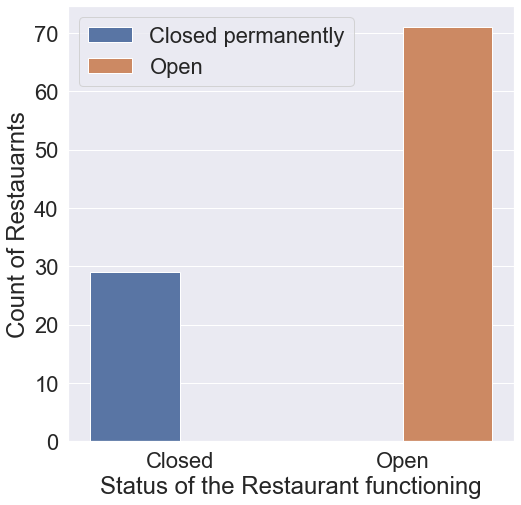

In [241]:
plt.figure(figsize=(8,8))

sns.set(font_scale=2)
ax=sns.countplot(x='is_open',data=df6,hue='is_open')
ax.set(xlabel='Status of the Restaurant functioning',ylabel='Count of Restauarnts')
plt.legend(['Closed permanently','Open'])



In [226]:
df6['stars_x']

0        2.5
3        3.5
13       4.5
168      3.5
367      3.5
378      3.0
417      3.0
451      2.5
457      3.0
493      1.5
496      3.5
502      3.5
552      2.5
559      2.5
573      2.5
609      3.0
730      2.0
741      4.0
1157     4.5
1178     4.5
1182     4.0
1209     4.0
1607     3.5
2364     4.5
2478     3.5
3127     3.5
3133     3.0
3155     2.5
3354     3.0
3375     3.0
        ... 
8042     2.0
8229     3.5
8350     3.5
8353     3.5
8383     3.0
8763     3.0
8769     4.0
9053     4.5
9428     2.5
9431     4.0
9456     3.5
9479     3.0
9640     4.0
9763     4.5
9772     2.0
9785     2.5
9798     4.5
9826     3.5
9928     2.5
10721    3.0
10839    5.0
10910    4.0
11777    4.5
11878    3.0
11960    4.0
11977    3.0
11994    3.0
12178    2.5
12311    4.0
13536    4.0
Name: stars_x, Length: 97, dtype: float64

[Text(0, 0.5, 'Number of Restaurants'),
 Text(0.5, 0, 'Ratings of the Restaurants')]

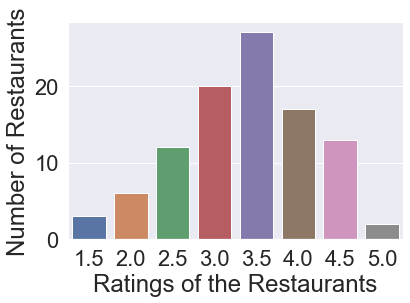

In [242]:
ay=sns.countplot(x='stars_x',data=df6)
ay.set(xlabel='Ratings of the Restaurants',ylabel='Number of Restaurants')


In [243]:
df4['stars_x'].value_counts()

4.0    4321
3.5    3351
4.5    2455
3.0    1793
2.5    1274
2.0     256
5.0      81
1.5      18
Name: stars_x, dtype: int64

In [228]:
df=df_final['name_x'].value_counts()[:10]

Cravings Buffet                       1402
Leticia's Mexican Cocina              1285
Kaizen Fusion Roll and Sushi           847
Northside Café and Chinese Kitchen     700
Downtown Terrace                       641
The Noodle Man                         632
Goong Korean BBQ Restaurant            605
Taj Palace                             602
Cleo                                   546
Hot N Juicy Crawfish                   542
Pure Indian Cuisine                    526
Griddlecakes                           465
Great Links Brewhouse & Grill          416
Jaburritos Sushi Burritos              395
Easy Life Boba Tea                     385
Sushi Mon                              344
Fremont Hotel & Casino                 339
Volcano Grille                         323
Bambino's East Coast Pizzeria          317
YuXiang Korean Chinese Cuisine         293
Niko's Pizza Las Vegas                 286
Ohana Hawaiian BBQ                     280
Chile Addiction                        278
Anise Tapas

In [ ]:
top10_percent_assets=(df.sort_values('Profits as % of Assets', ascending=False)[:10])

(-0.5, 1199.5, 999.5, -0.5)

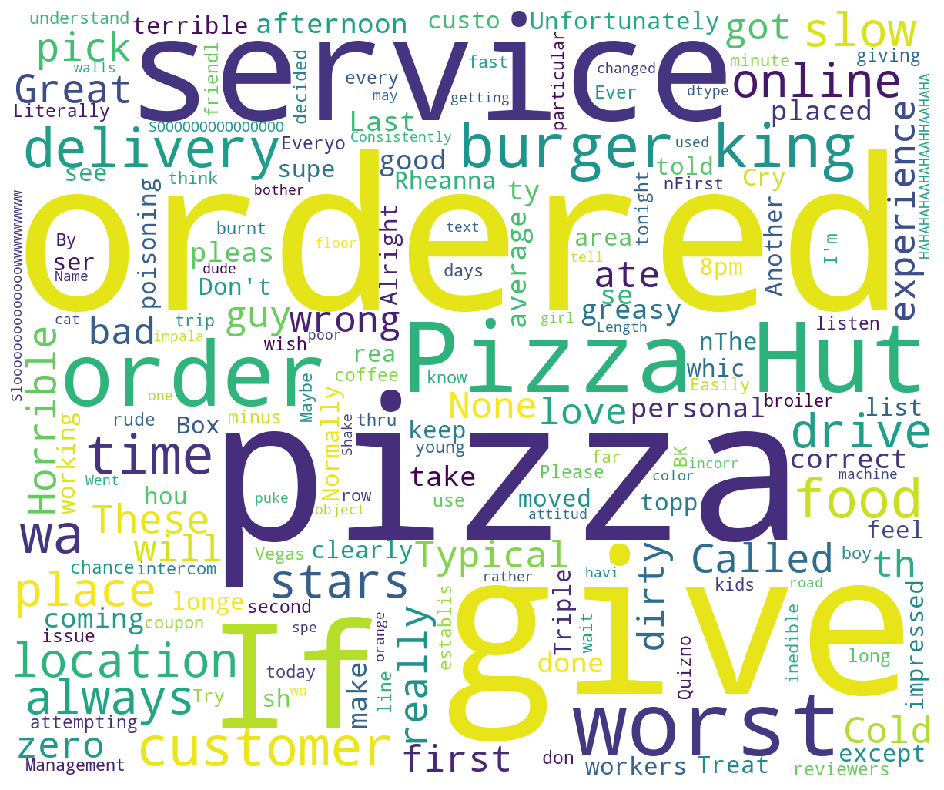

In [221]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

wordcloud = WordCloud(background_color='white',
                          width=1200,
                      stopwords = STOPWORDS,
                          height=1000
                         ).generate(str(df_final['text']))


plt.imshow(wordcloud)
plt.axis('off')

In [6]:
user_agg=df_reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})


NameError: name 'df_reviews' is not defined

In [18]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id                 date                       \
                           count                  min                  max   
user_id                                                                      
3nDUQBjKyVor5wV0reJChg        16  2010-06-23 18:17:38  2018-06-17 07:01:44   
bLbSNkLggFnqwNNzzq-Ijw        15  2014-03-02 01:36:39  2017-12-07 08:09:36   
_VMGbmIeK71rQGwOBWt_Kg        13  2012-01-05 04:17:09  2016-04-15 01:06:53   
UYcmGbelzRa0Q6JqzLoguw        12  2011-01-27 04:01:47  2018-04-08 19:45:30   
PKEzKWv_FktMm2mGPjwd0Q        12  2010-10-02 16:24:38  2017-06-19 21:17:06   
s2o_JsABvrZVm_T03qrBUw        11  2011-07-28 22:01:35  2017-11-19 10:38:09   
8DEyKVyplnOcSKx39vatbg         9  2007-10-11 09:17:27  2015-11-09 16:00:36   
vWP8-aQX0rYJszqkWVL7Ew         9  2011-04-25 07:07:19  2014-02-21 06:42:01   
3Vd_ATdvvuVVgn_YCpz8fw         9  2008-11-15 21:50:27  2010-03-12 01:43:26   
YMgZqBUAddmFErxLtCfK_w         9  2011-03-27 20:37:40  2016-09-27 20:10:36   

                       useful  funny   cool     stars  
                          sum    sum    sum      mean  
user_id                                                
3nDUQBjKyVor5wV0reJChg   95.0   38.0   66.0  3.625000  
bLbSNkLggFnqwNNzzq-Ijw  211.0  101.0  139.0  3.066667  
_VMGbmIeK71rQGwOBWt_Kg   83.0   41.0   68.0  4.230769  
UYcmGbelzRa0Q6JqzLoguw  103.0   54.0   90.0  3.583333  
PKEzKWv_FktMm2mGPjwd0Q  110.0   56.0   75.0  3.500000  
s2o_JsABvrZVm_T03qrBUw   58.0   25.0   43.0  3.636364  
8DEyKVyplnOcSKx39vatbg  199.0  125.0  144.0  3.111111  
vWP8-aQX0rYJszqkWVL7Ew   33.0    9.0   20.0  3.222222  
3Vd_ATdvvuVVgn_YCpz8fw   58.0   29.0   39.0  2.222222  
YMgZqBUAddmFErxLtCfK_w   25.0   11.0   22.0  3.777778

In [19]:
top_user_reviews=df_reviews[df_reviews['user_id']=='3nDUQBjKyVor5wV0reJChg']
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,df_business,on='business_id')
# UNique list of dates from the user's reviews
date_list=list(top_user_locs['date'].unique())
#rearranging data to suit the format needed for folium
data=[]
for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date']]
    data.append(subset[['latitude','longitude']].values.tolist())

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [4]:
df_business=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_business.csv")


In [5]:
df_business=df_business[df_business['categories'].apply(lambda x: True if 'Restaurants' in str(x)else False)].reset_index(drop=True)
df_reviews=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_review.csv")


C:\Users\apoor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
hundred_business=list(set(df_business['business_id']))[0:500]
print(df_business.head())
#df_users=pd.read_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/vegas_user.csv")

   Unnamed: 0             business_id                                 name  \
0           1  PZ-LZzSlhSe9utkQYU8pFg           Carluccio's Tivoli Gardens   
1           6  tstimHoMcYbkSC4eBA1wEg  Maria's Mexican Restaurant & Bakery   
2          17  kANF0dbeoW34s2vwh6Umfw                          Dairy Queen   
3          26  X8mtoSxY8whtmbDlj0D3Aw                Imperial Asian Buffet   
4          31  bJP4l_BGq2CudEu0m-wNjg             Artisan Fine Dining Room   

                            address       city state  postal_code   latitude  \
0      1775 E Tropicana Ave, Ste 29  Las Vegas    NV      89119.0  36.100016   
1             6055 E Lake Mead Blvd  Las Vegas    NV      89156.0  36.195615   
2           6125 Spring Mountain Rd  Las Vegas    NV      89146.0  36.125031   
3                  4343 N Rancho Dr  Las Vegas    NV      89030.0  36.238596   
4  Artisan Hotel, 1501 W Sahara Ave  Las Vegas    NV      89102.0  36.143672   

    longitude  stars  ...  attributes.BYOBCorkage 

In [11]:
df_reviews = df_reviews[df_reviews['business_id'].isin(hundred_business)].reset_index(drop=True)
#df_review_users = pd.merge(df_users, df_reviews, on='user_id', how='left')
#df_review_users = df_review_users[df_review_users['business_id'].isin(hundred_business)].reset_index(drop=True)


In [12]:
df_final = pd.merge(df_business, df_reviews, on='business_id', how='right').reset_index(drop=True)

In [13]:
df_final.to_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/500_1.csv")

In [14]:
df_final.head()

,Unnamed: 0_x,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,attributes.RestaurantsCounterService,Unnamed: 0_y,review_id,user_id,stars_y,useful,funny,cool,text,date
0,79,LEOvXK3lMEfjnex3CPvrng,Albinas Italian American Bakery,3035 E Tropicana Ave,Las Vegas,NV,89121.0,36.099218,-115.10966,4.5,...,NaN,10638,llYsZDjVqr4uxUZmsu8GuQ,jo8vV5iUZLHp617cTKZ7mA,3.0,0.0,0.0,0.0,Albinas is one great Italian bakery.... Your b...,2010-01-10 21:17:55
1,79,LEOvXK3lMEfjnex3CPvrng,Albinas Italian American Bakery,3035 E Tropicana Ave,Las Vegas,NV,89121.0,36.099218,-115.10966,4.5,...,NaN,41709,XaC_redSCgO-5Z4gENUUeA,nzsv-p1O8gCfP3XijfQrIw,4.0,6.0,2.0,7.0,I found this place through yelp. It sounded li...,2008-12-30 17:40:14
2,79,LEOvXK3lMEfjnex3CPvrng,Albinas Italian American Bakery,3035 E Tropicana Ave,Las Vegas,NV,89121.0,36.099218,-115.10966,4.5,...,NaN,54952,eOKg_IgtR2L2yDrhijnQNw,AoII0-uM9z0EesGnb9YCjQ,5.0,5.0,1.0,1.0,Best Cannolis I've found in Vegas hands down. ...,2011-06-04 14:31:38
3,79,LEOvXK3lMEfjnex3CPvrng,Albinas Italian American Bakery,3035 E Tropicana Ave,Las Vegas,NV,89121.0,36.099218,-115.10966,4.5,...,NaN,62003,S0e500xf0rfmiS7VXc8Scg,hTEEHPvMbAN6JCEUZhDQhg,5.0,2.0,1.0,3.0,Albina's Bakery is an unassuming hole in the w...,2008-01-28 02:55:43
4,79,LEOvXK3lMEfjnex3CPvrng,Albinas Italian American Bakery,3035 E Tropicana Ave,Las Vegas,NV,89121.0,36.099218,-115.10966,4.5,...,NaN,82006,P53FF8jAX7X6oY1awA5fAg,6QmLTkRhQaY3WXTGHeL5vQ,4.0,2.0,1.0,3.0,"It's a small place, and pretty ""no frills"" but...",2011-01-23 23:37:34


In [195]:
for col in df4:
    print(col)

Unnamed: 0
Unnamed: 0.1
business_id
name_x
address
city
state
postal_code
latitude
longitude
stars_x
review_count_x
is_open
categories
hours
attributes.GoodForKids
attributes.RestaurantsReservations
attributes.GoodForMeal
attributes.BusinessParking
attributes.Caters
attributes.NoiseLevel
attributes.RestaurantsTableService
attributes.RestaurantsTakeOut
attributes.RestaurantsPriceRange2
attributes.OutdoorSeating
attributes.BikeParking
attributes.Ambience
attributes.HasTV
attributes.WiFi
attributes.Alcohol
attributes.RestaurantsAttire
attributes.RestaurantsGoodForGroups
attributes.RestaurantsDelivery
hours.Monday
hours.Tuesday
hours.Wednesday
hours.Thursday
hours.Friday
hours.Saturday
hours.Sunday
attributes.BusinessAcceptsCreditCards
attributes
attributes.BusinessAcceptsBitcoin
attributes.ByAppointmentOnly
attributes.AcceptsInsurance
attributes.Music
attributes.GoodForDancing
attributes.CoatCheck
attributes.HappyHour
attributes.BestNights
attributes.WheelchairAccessible
attributes.DogsAl

In [324]:
df4[['name_y','user_id']]

,name_y,user_id
0,Keisha,u8DFIdpVWYXh2X1DnV5wcA
1,Suzanne,CJuka8-Hh1iwqKtlxvF2iw
2,Jenna,NnzlKb79WFKppSW_0Lg1-A
3,August,LkWNo83Lg92C5V4JEyxOZA
4,Kellee,ZsUSGU1-L1ImomLZjXxxTg
5,Matthew,M6uDHCxhZybBdngFuBmrHg
6,Robin,0qxWgeSiFZDp6DQgvwJItA
7,Candace,h9RUaaHa5kcQKqtJ-sgS0Q
8,Paul,DCs_XuFw-PkRofKcCFEZ2A
9,Paul,DCs_XuFw-PkRofKcCFEZ2A


In [326]:
a=df4[df4.user_id == "bLbSNkLggFnqwNNzzq-Ijw"]
a

,Unnamed: 0,Unnamed: 0.1,business_id,name_x,address,city,state,postal_code,latitude,longitude,...,compliment_writer,compliment_photos,Unnamed: 0_y,review_id,stars_y,useful_y,funny_y,cool_y,text,date
368,368,1034,vafLJO0wyb421AlOfxMiig,Mamma's Boy Cafe,"6475 W Charleston Blvd, Ste 160",Las Vegas,NV,89146,36.158604,-115.236715,...,690,912,60128,TWzK8RAKw04BCYcc1F2R4g,4,11,8,10,A food court counter serving up smothered pork...,2014-11-03 05:42:16
381,381,1170,rMVi-Vn_mN_X9J1ZSl1lWA,Baja Fresh,"7501 W Lake Mead Blvd, Ste 100",Las Vegas,NV,89128,36.195451,-115.257432,...,690,912,152996,IBkkyKK-7KhOEdQc_VmR8w,3,1,3,1,"All this time, I thought Baja Fresh was a fast...",2014-10-08 22:49:21
511,511,2240,QkSf6Dgn4hYWNfaT6_kd5A,MIX 94.1's Bite Of Las Vegas,8275 W Spring Mtn Rd,Las Vegas,NV,89117,36.125283,-115.273581,...,690,912,184262,4UIhC6RUyJsj3kQRPtO8fA,4,8,5,5,What a fun event! Went with two fellow Yelpers...,2015-09-23 14:33:06
774,774,3619,dWrezcuIAO-Ckx1W0gu5jg,Parma By Chef Marc,"7591 W Washington Ave, Ste 110",Las Vegas,NV,89128,36.180824,-115.258967,...,690,912,315081,EvtRQxosBU6hnUkiDXw9yw,4,2,3,1,Tasty lunch- and conveniently located by my wo...,2014-03-06 23:31:25
1227,1227,4979,MgSd4P3ATkiywbbraFygHg,Plantone's Italian Market,8680 W Warm Springs Rd,Las Vegas,NV,89148,36.055720,-115.281181,...,690,912,216573,BZzDAYmVjC7-FfQfhcjQTQ,4,32,17,21,Plantone's is the newest business to hit the s...,2017-01-16 08:14:56
1649,1649,5233,KalAJyO0Zpg3K1wVwYXBHA,Marché Bacchus,"2620 Regatta Dr, Ste 106",Las Vegas,NV,89128,36.207539,-115.268154,...,690,912,341276,R12JW0KODx2tPYpjQbyP9g,5,20,7,15,"Great food, beautiful setting, impeccable serv...",2016-08-21 02:18:00
2495,2495,6757,u_8cVZyxh0J468zEZUjNDQ,Pin-Up Pizza,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.109496,-115.172363,...,690,912,456313,1XqJnpnWK6aJUjYAmCHWFw,3,13,7,9,"Sorry, I prefer Secret Pizza. I like how Pin U...",2016-06-16 08:40:50
3531,3531,8484,ssksLNNDZZfh_ydI78kDfg,J & J Szechuan Cuisine川味坊,"5700 Spring Mountain Rd, Ste A",Las Vegas,NV,89146,36.126527,-115.219437,...,690,912,410193,kaVHQP2gca5A1rSAz6N_cQ,3,3,2,4,"Not only do they have hotpots here, they can e...",2014-12-01 06:24:02
4974,4974,13104,HJdcjuoTcaf3aBPBxYPc5g,Ono's Island BBQ,5740 W Charleston Blvd,Las Vegas,NV,89146,36.159371,-115.220197,...,690,912,841567,vX3i6m2ryzf8y_Pf9KwNqA,3,22,12,21,A food truck stationed right outside of a bar-...,2017-01-29 08:19:50
4998,4998,13213,bOddIZaNIQAYju-EgYBuIA,LuLu Hawaiian BBQ,881 S Rainbow Blvd,Las Vegas,NV,89145,36.161774,-115.245360,...,690,912,869886,MiXHqTuSCEZIrwyypXGBYg,3,22,5,9,"Hawaiian takeout, similar to L&L. Combo plates...",2017-06-21 10:26:31


In [12]:
user_agg=df4.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful_y':['sum'],'funny_y':['sum'],'cool_y':['sum'],
                               'stars_y':['mean']})

In [14]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(30)

          Top 10 Users in Yelp


review_id                 date                       \
                           count                  min                  max   
user_id                                                                      
bLbSNkLggFnqwNNzzq-Ijw        17  2014-02-02 00:44:50  2018-10-03 17:07:19   
U4INQZOPSUaj8hMjLlZ3KA        12  2013-10-22 23:01:06  2018-10-18 13:20:50   
3nDUQBjKyVor5wV0reJChg        12  2010-06-12 00:13:27  2018-05-21 14:26:29   
L5JFnETi16y2gNiESXBYeA        11  2013-11-20 22:45:43  2017-10-29 20:08:10   
uEvusDwoSymbJJ0auR3muQ        10  2012-01-09 18:35:18  2013-06-02 00:10:57   
8DEyKVyplnOcSKx39vatbg         9  2007-11-02 00:46:22  2016-07-28 15:04:28   
PKEzKWv_FktMm2mGPjwd0Q         9  2010-04-20 04:27:48  2018-09-03 01:52:03   
n86B7IkbU20AkxlFX_5aew         9  2010-02-24 03:20:34  2017-08-11 02:12:18   
s2o_JsABvrZVm_T03qrBUw         8  2012-01-10 18:32:03  2017-02-02 08:30:38   
HJj82f-csBI7jjgenwqhvw         8  2012-07-10 05:11:53  2018-01-21 06:35:57   
Fv0e9RIV9jw5TX3ctA1WbA         8  2012-06-18 03:37:56  2017-11-29 06:05:39   
1O638BDK_fWuxgTVJwff-A         8  2008-05-06 02:34:37  2016-05-30 08:37:49   
eZZyuJDouIg4p-GYB3PV_A         8  2011-06-14 10:19:37  2018-06-21 03:50:55   
YwaKGmRNnSa3R3N4Hf9jLw         8  2009-04-28 19:25:42  2011-04-24 17:36:22   
L15JCA18Ib_vMUVJILxiSw         7  2010-04-16 17:26:18  2015-05-15 18:30:13   
L8P5OWO1Jh4B2HLa1Fnbng         7  2009-12-26 23:58:10  2015-12-28 10:28:06   
_VMGbmIeK71rQGwOBWt_Kg         7  2012-01-05 04:17:09  2018-10-01 00:15:24   
I-4KVZ9lqHhk8469X9FvhA         7  2018-04-10 04:10:13  2018-09-25 14:59:32   
QJI9OSEn6ujRCtrX06vs1w         7  2010-05-23 01:07:55  2013-05-10 12:53:06   
qQecSd0lynfB4g-LPa9JCw         7  2007-09-26 04:24:28  2017-12-21 07:00:35   
48vRThjhuhiSQINQ2KV8Sw         7  2010-08-27 04:22:14  2011-06-29 06:05:09   
o4tYl3Hz0oDfpNn4k02DCw         6  2011-06-16 23:50:24  2014-02-02 04:07:45   
tH0uKD-vNwMoEc3Xk3Cbdg         6  2012-09-25 04:03:32  2016-06-29 15:57:03   
FRxGcIRukrH5lW2SQSxstg         6  2016-10-10 21:20:35  2018-10-23 06:01:34   
qPVtjjp8sNQ32p9860SR9Q         6  2014-07-18 19:48:41  2018-05-07 23:28:10   
KmBPYlD00BupKSwWxOWA6w         6  2012-03-12 20:37:49  2013-03-17 16:33:25   
Ksp1e9Dw0Jcog_ZBD3-45g         6  2012-11-29 09:31:27  2018-04-18 22:24:15   
eOIMO2wT_WbNqmavhnCRxw         6  2012-07-07 16:34:27  2017-10-07 18:19:49   
3Vd_ATdvvuVVgn_YCpz8fw         6  2008-11-02 17:12:52  2009-10-18 20:46:32   
WM7MFrRP-7YFuGBAJ6quRQ         6  2014-03-18 23:42:44  2018-01-05 21:40:15   

                       useful_y funny_y cool_y   stars_y  
                            sum     sum    sum      mean  
user_id                                                   
bLbSNkLggFnqwNNzzq-Ijw      238     125    175  3.529412  
U4INQZOPSUaj8hMjLlZ3KA       72      31     43  3.750000  
3nDUQBjKyVor5wV0reJChg       83      36     74  4.416667  
L5JFnETi16y2gNiESXBYeA        9       2      3  3.090909  
uEvusDwoSymbJJ0auR3muQ       69      33     50  3.800000  
8DEyKVyplnOcSKx39vatbg      172      95    111  3.666667  
PKEzKWv_FktMm2mGPjwd0Q       65      26     50  3.666667  
n86B7IkbU20AkxlFX_5aew       33      13     27  3.777778  
s2o_JsABvrZVm_T03qrBUw       55      15     39  4.375000  
HJj82f-csBI7jjgenwqhvw       43      28     31  3.750000  
Fv0e9RIV9jw5TX3ctA1WbA      198     116    171  3.875000  
1O638BDK_fWuxgTVJwff-A       16       9     13  3.750000  
eZZyuJDouIg4p-GYB3PV_A       20       5     13  3.750000  
YwaKGmRNnSa3R3N4Hf9jLw       13       4      6  3.750000  
L15JCA18Ib_vMUVJILxiSw       15      11      6  3.428571  
L8P5OWO1Jh4B2HLa1Fnbng       13       4      4  3.428571  
_VMGbmIeK71rQGwOBWt_Kg       43      18     33  4.571429  
I-4KVZ9lqHhk8469X9FvhA      125      68    117  4.857143  
QJI9OSEn6ujRCtrX06vs1w       47      21     39  3.428571  
qQecSd0lynfB4g-LPa9JCw       13       5      3  3.428571  
48vRThjhuhiSQINQ2KV8Sw       16       2      7  3.571429  
o4tYl3Hz0oDfpNn4k02DCw       33 

In [ ]:
for i in 

In [52]:
influencers=['bLbSNkLggFnqwNNzzq-Ijw','8DEyKVyplnOcSKx39vatbg','Fv0e9RIV9jw5TX3ctA1WbA']
top_user_reviews=df_reviews[df_reviews['user_id'].isin(influencers)]
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,df_business,on='business_id')
# UNique list of dates from the user's reviews
#date_list=list(top_user_locs['date'].unique())
date_list=list(top_user_locs['date'])
#rearranging data to suit the format needed for folium
data=[]
data1=[]

df8 = pd.DataFrame()


for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date','name','stars_x']]
    data12 = pd.DataFrame({"lat":df['latitude'],"lon": df['longitude'],"date": df['date'],"Name": df['name'],"Ratings":df['stars_x']})
    df8=df8.append(data12)
    

In [54]:
df8
    

,lat,lon,date,Name,Ratings
0,36.016493,-115.117069,2017-08-16 14:55:24,Boteco,3.0
1,36.016493,-115.117069,2017-07-05 08:55:51,Boteco,3.0
2,36.171308,-115.140268,2015-02-02 06:36:27,Gold Spike,3.0
3,36.169741,-115.205520,2015-01-18 17:54:31,Taqueria El Buen Pastor,2.0
4,36.169741,-115.205520,2015-01-09 08:10:18,Taqueria El Buen Pastor,2.0
5,36.176102,-115.260282,2014-01-17 03:30:17,The Bagel Cafe,3.0
6,36.176102,-115.260282,2014-07-16 16:34:16,The Bagel Cafe,1.0
7,36.176102,-115.260282,2012-06-17 22:07:58,The Bagel Cafe,4.0
8,36.113693,-115.307572,2014-10-11 22:24:33,Aranya Thai Bistro,2.0
9,36.068778,-115.176840,2014-07-28 15:31:37,Sugar Factory,3.0


In [55]:
df8.to_csv("C:/Desktop/NUIG assignments sem2/Projects/FINAL PROJECT/latlonfinalmapttableauone.csv")

In [80]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


In [87]:
type(data1)

list

In [72]:
cols1 = ['latitude',
 'longitude',
 'stars_x',
 'review_count_x']

In [96]:
cols2 = ['latitude',
 'longitude',
 'stars',
 'review_count','hours']

In [307]:
full_100=pd.read_excel("C:/Desktop/df_final.xlsx")

In [309]:
unique_df=full_100.drop_duplicates(subset=['business_id'],keep= 'last')

In [310]:
X = unique_df[cols1]
y = unique_df['is_open']

In [77]:
X.fillna(0.0,inplace=True)

C:\Users\apoor\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [312]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [313]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(train_X, train_y)

In [314]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [315]:
LR = LogisticRegression()

In [316]:
LR.fit(X_res,y_res)
pred_y = LR.predict(test_X)

C:\Users\apoor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [318]:
accuracy = 100*accuracy_score(test_y,pred_y)
print(accuracy)

60.0


In [292]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [319]:
review_business = full_100.groupby(by='business_id')

In [97]:
X = df10[cols2]
y = df10['is_open']

In [98]:
X.fillna(0.0,inplace=True)

C:\Users\apoor\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [99]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [100]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(train_X, train_y)

In [87]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [101]:
LR = LogisticRegression()

In [102]:
LR.fit(X_res,y_res)
pred_y = LR.predict(test_X)

In [105]:
accuracy = 100*accuracy_score(test_y,pred_y)
print(accuracy)

57.674418604651166


In [321]:
review_businesid = pd.DataFrame()
review_businesid['Mean'] = review_business['stars_x'].mean()
review_businesid['Median'] = review_business['stars_x'].median()
review_businesid['NumberOfReviews'] = review_business['stars_x'].count()

In [ ]:
L = [0.0001,0.001,0.01,0.1,1,10]
accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,y_res)
    pred_y = LR.predict(test_X)
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)